In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Connecting to the db
host_db = "cal-patent-lab.chhaitskv8dz.us-west-2.rds.amazonaws.com"
username = "***REMOVED***"
password = "***REMOVED***"
db = "***REMOVED***"

def get_information(query, host_db="cal-patent-lab.chhaitskv8dz.us-west-2.rds.amazonaws.com", 
                    username="***REMOVED***", password="***REMOVED***", db="***REMOVED***"):
    # Connecting to the fung db
    engine_fung = create_engine("mysql://{}:{}@{}/{}".format(
        username, password, host_db, db))
    connection_fung = engine_fung.connect()
    patent_info = pd.read_sql(
        query, engine_fung)
    connection_fung.close()
    return patent_info

In [3]:
all_cases = get_information("SELECT * FROM ptab_cases")
all_info = get_information('SELECT * FROM patent_info')

In [4]:
ptab_cases = all_cases[all_cases.denied.notnull()]
ptab_stats = ptab_cases.merge(all_info,suffixes = ["_ptab", "_patent"], on="patent_id")

So far, we have only 3645 with a decision, denied or invalidated

In [5]:
art_unit_list = np.unique(ptab_stats.art_unit)
petitioner_list = np.unique(ptab_stats.petitioner_name)
owner_list = np.unique(ptab_stats.patent_owner)
examiner_list = np.unique(ptab_stats.examiner_name)

We have 486 different art units, 1209 petitioner name, 1357 owners, 1320 examiners

In [6]:
ptab_stats_without_duplicates = ptab_stats.drop_duplicates(subset="patent_id")

In [7]:
# they have more than 5
famous_owners = ptab_stats.patent_owner.value_counts()[:54]
# more than 10
famous_examiners = ptab_stats.examiner_name.value_counts()[:42]
# more than 10
famous_petitioners = ptab_stats.petitioner_name.value_counts()[:49]
# more than 15
famous_art_unit = ptab_stats.art_unit.value_counts()[:49]

In [93]:
famous_art_unit.sum()
famous_petitioners.sum()
famous_examiners.sum()

725L

In [28]:
# stats for art units
art_unit = pd.DataFrame([], columns=['art_unit', 'invalidated', 'denied'])
for index in famous_art_unit.index:
    num_invalidated = ptab_stats[(ptab_stats.art_unit == index)].invalidated.sum()
    num_not_invalidated = len(ptab_stats[(ptab_stats.art_unit == index) & (ptab_stats.invalidated.notnull())].invalidated)  
    num_denied = ptab_stats[(ptab_stats.art_unit == index)].denied.sum()
    num_not_denied = len(ptab_stats[(ptab_stats.art_unit == index) & (ptab_stats.denied.notnull())].denied)
    new_row = pd.DataFrame([[index, num_invalidated/num_not_invalidated, 
                             num_denied/num_not_denied]], columns=['art_unit', 'invalidated', 'denied'])
    art_unit = art_unit.append(new_row)

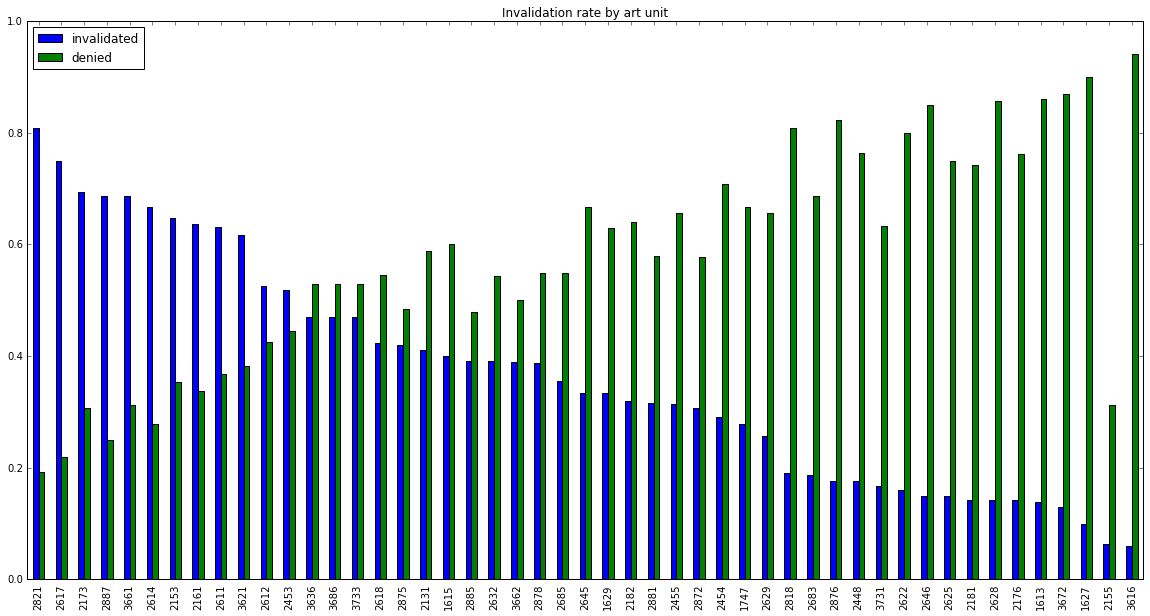

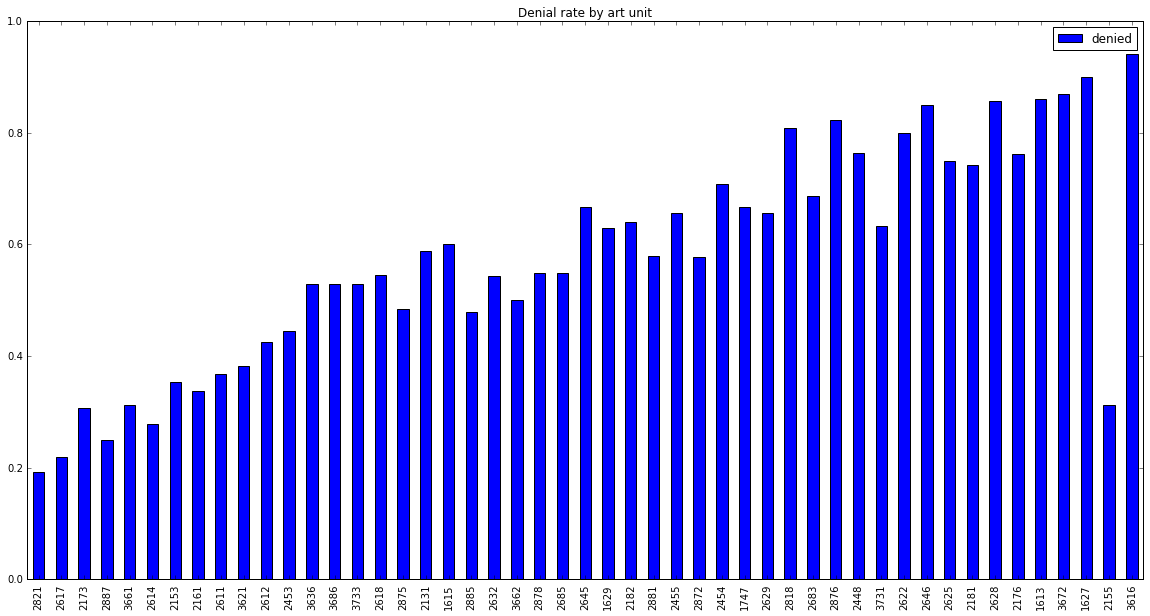

In [86]:
art_unit.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_art_unit.index, y=['invalidated', 'denied'], figsize=(20, 10), title='Invalidation rate by art unit')
art_unit.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_art_unit.index, y='denied', figsize=(20, 10), title='Denial rate by art unit')

In [72]:
# stats for petitioner
petitioner = pd.DataFrame([], columns=['petitioner_name', 'invalidated', 'denied'])
for index in famous_petitioners.index:
    num_invalidated = ptab_stats[(ptab_stats.petitioner_name == index)].invalidated.sum()
    num_not_invalidated = len(ptab_stats[(ptab_stats.petitioner_name == index) & (ptab_stats.invalidated.notnull())].invalidated)  
    num_denied = ptab_stats[(ptab_stats.petitioner_name == index)].denied.sum()
    num_not_denied = len(ptab_stats[(ptab_stats.petitioner_name == index) & (ptab_stats.denied.notnull())].denied)
    
    new_row = pd.DataFrame([[index, num_invalidated/num_not_invalidated, 
                             num_denied/num_not_denied]], columns=['petitioner_name', 'invalidated', 'denied'])
    petitioner = petitioner.append(new_row)

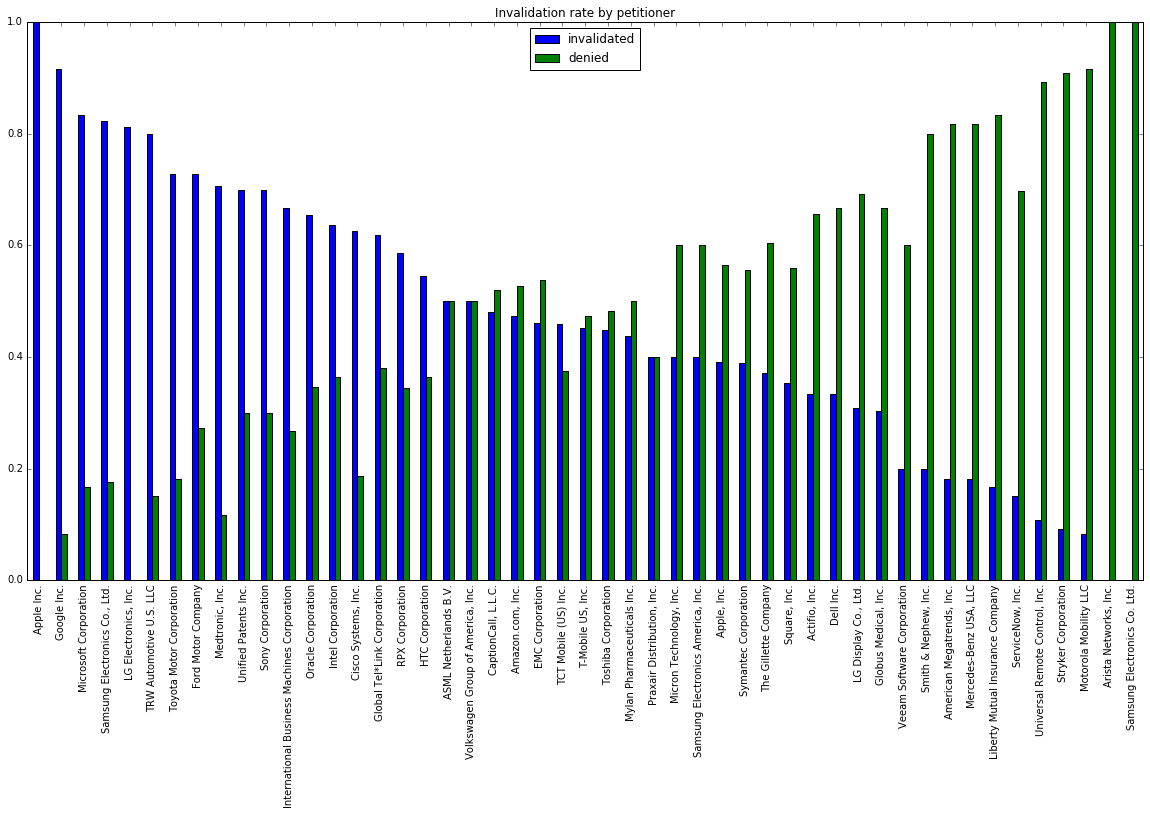

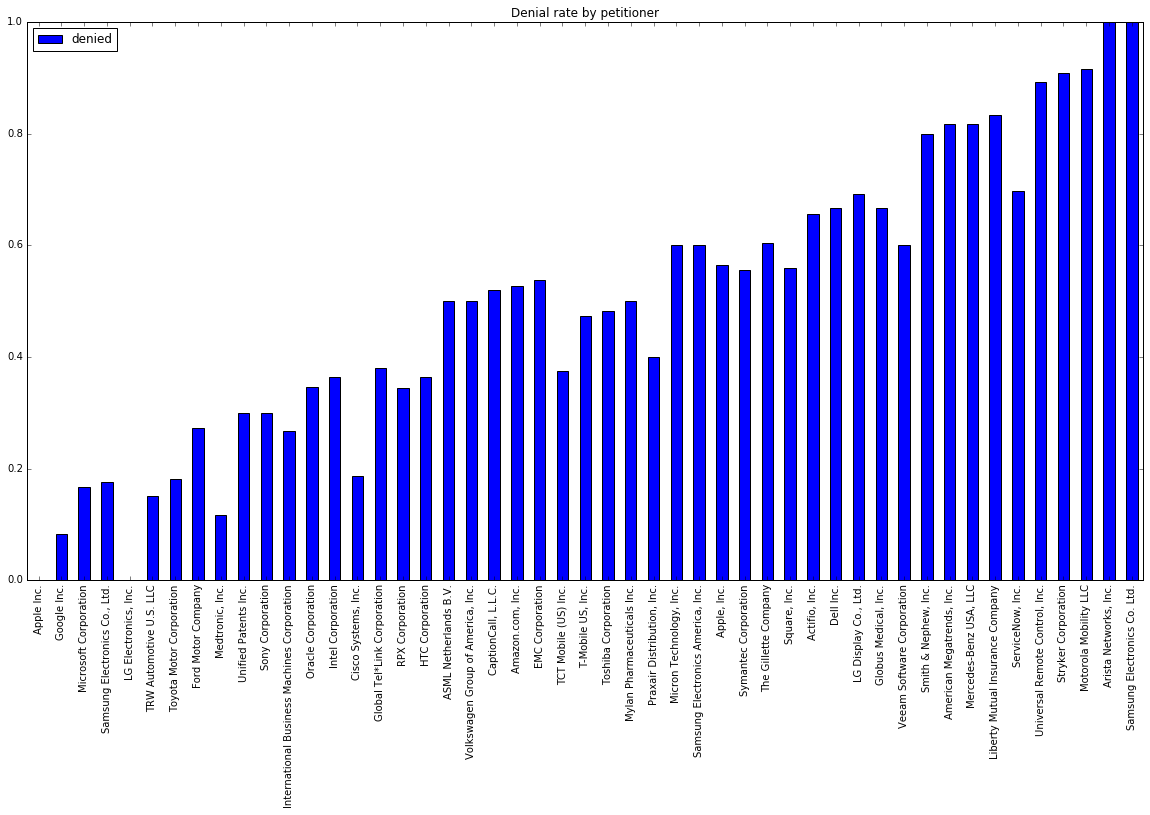

In [83]:
plt.figure()
petitioner.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_petitioners.index, y=['invalidated', 'denied'], figsize=(20, 10), title='Invalidation rate by petitioner')
petitioner.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_petitioners.index, y='denied', figsize=(20, 10), title='Denial rate by petitioner')

In [80]:
# stats for examiner
examiner = pd.DataFrame([], columns=['examiner', 'invalidated', 'denied'])
for index in famous_examiners.index:
    num_invalidated = ptab_stats[(ptab_stats.examiner_name == index)].invalidated.sum()
    num_not_invalidated = len(ptab_stats[(ptab_stats.examiner_name == index) & (ptab_stats.invalidated.notnull())].invalidated)  
    num_denied = ptab_stats[(ptab_stats.examiner_name == index)].denied.sum()
    num_not_denied = len(ptab_stats[(ptab_stats.examiner_name == index) & (ptab_stats.denied.notnull())].denied)
    new_row = pd.DataFrame([[index, num_invalidated/num_not_invalidated, 
                             num_denied/num_not_denied]], columns=['examiner', 'invalidated', 'denied'])
    examiner = examiner.append(new_row)

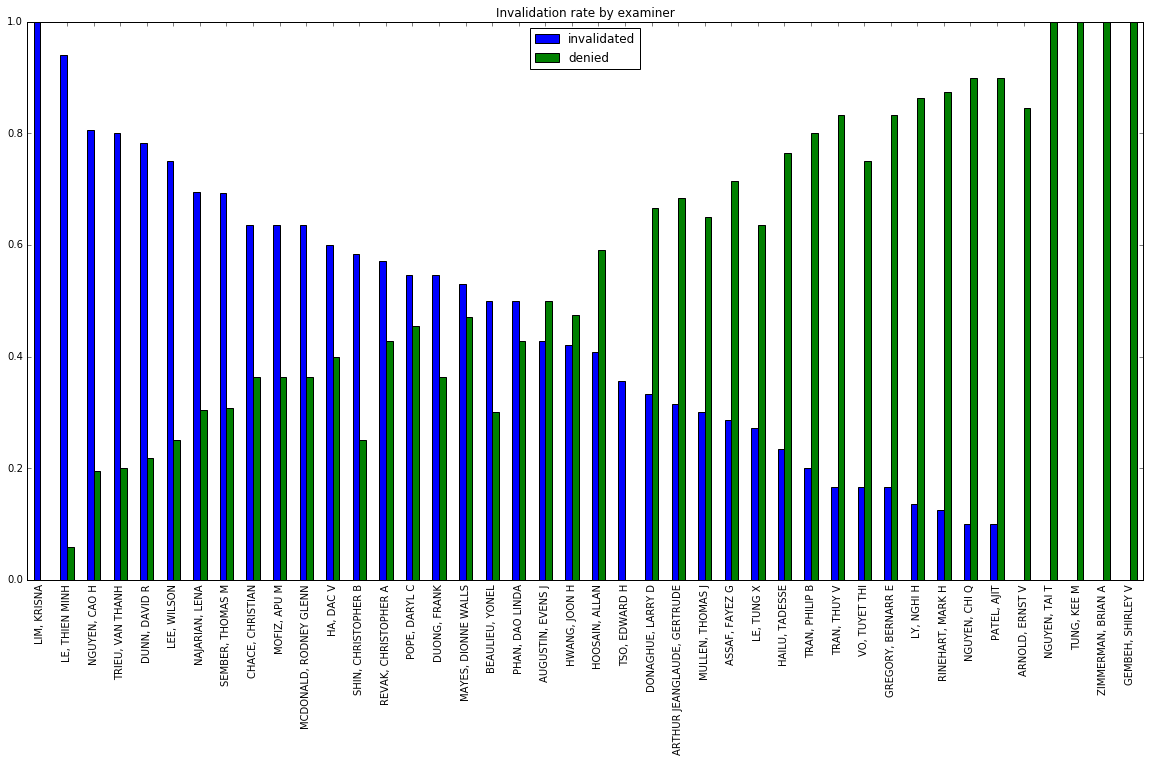

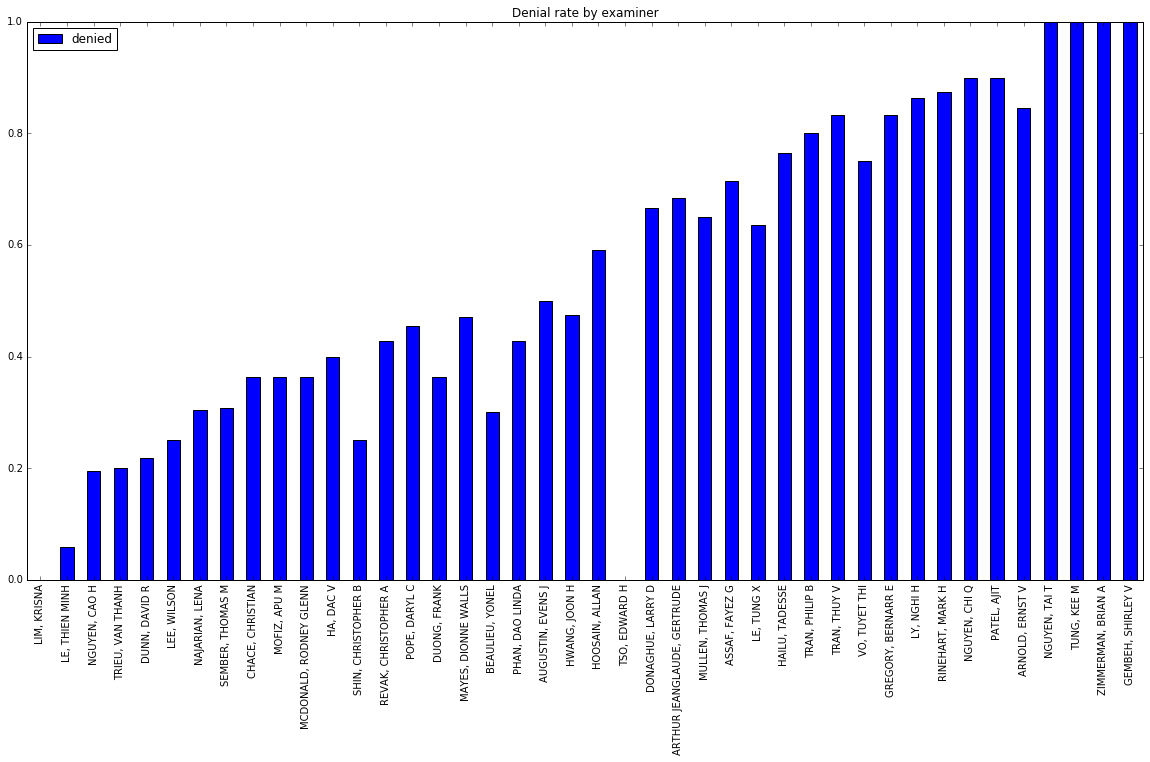

In [84]:
examiner.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_examiners.index, y=['invalidated', 'denied'], figsize=(20, 10), title='Invalidation rate by examiner')
examiner.sort_values('invalidated', ascending=False).plot.bar(
    x=famous_examiners.index, y='denied', figsize=(20, 10), title='Denial rate by examiner')